# Manual Annotation-Clustering for Dirty and Dangerous categories

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk import FreqDist
import ast
from shutil import copyfile
import glob
import os
import pickle
%matplotlib inline

In [3]:
df=pd.read_csv("all-places-median-medina-epfl.csv")

In [4]:
df.head()

,annotation,Dangerous,Dirty,city
0,s_20140101_125134.jpg,2.0,2.0,gc
1,s_20140101_125419.jpg,2.5,3.0,gc
2,s_20140101_125819.jpg,2.0,2.5,gc
3,s_20140101_125835.jpg,4.0,4.0,gc
4,s_20140101_125939.jpg,3.0,3.0,gc


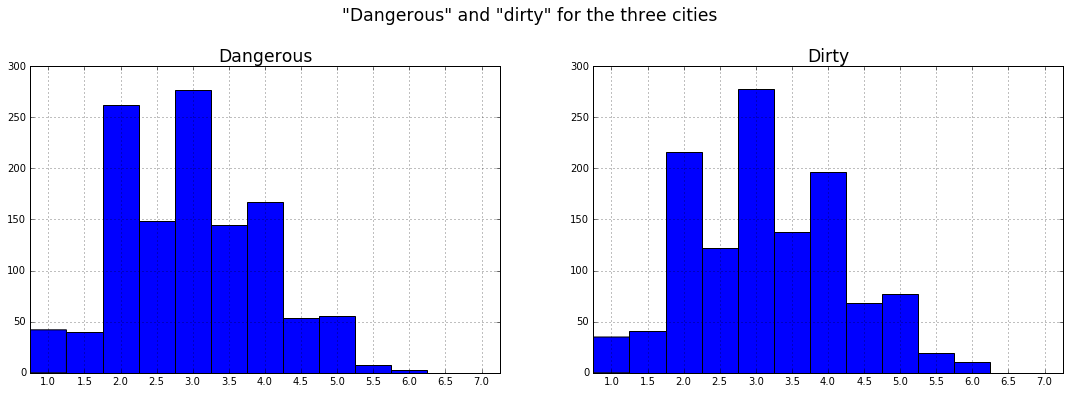

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
df.Dangerous.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.title('Dangerous',fontsize='xx-large')
plt.subplot(1,2,2)
df.Dirty.hist(bins =np.arange(1,8.0,0.5)-0.25)
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.title('Dirty',fontsize='xx-large')
plt.suptitle('"Dangerous" and "dirty" for the three cities', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 5.5)

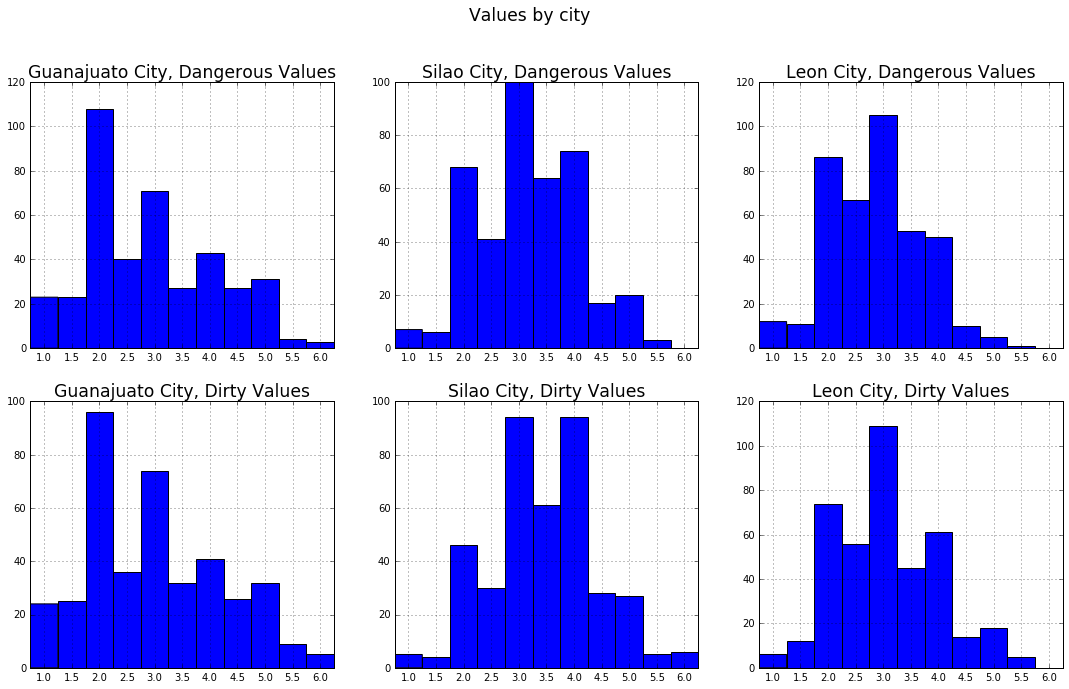

In [5]:
fig, ax = plt.subplots(nrows=2,ncols=3)
#Dangerous
plt.subplot(2,3,1)
df[df.city=='gc'].Dangerous.hist(bins=np.arange(1,7.0,0.5)-0.25)
plt.xticks(np.arange(1,6.5,0.5))
plt.xlim([0.75, 6.25])
plt.title('Guanajuato City, Dangerous Values',fontsize='xx-large')
plt.subplot(2,3,2)
df[df.city=='sc'].Dangerous.hist(bins=np.arange(1,7.0,0.5)-0.25)
plt.xticks(np.arange(1,6.5,0.5))
plt.xlim([0.75, 6.25])
plt.title('Silao City, Dangerous Values',fontsize='xx-large')
plt.subplot(2,3,3)
df[df.city=='lc'].Dangerous.hist(bins=np.arange(1,7.0,0.5)-0.25)
plt.xticks(np.arange(1,6.5,0.5))
plt.xlim([0.75, 6.25])
plt.title('Leon City, Dangerous Values',fontsize='xx-large')
#Dirty
plt.subplot(2,3,4)
df[df.city=='gc'].Dirty.hist(bins=np.arange(1,7.0,0.5)-0.25)
plt.xticks(np.arange(1,6.5,0.5))
plt.xlim([0.75, 6.25])
plt.title('Guanajuato City, Dirty Values',fontsize='xx-large')
plt.subplot(2,3,5)
df[df.city=='sc'].Dirty.hist(bins=np.arange(1,7.0,0.5)-0.25)
plt.xticks(np.arange(1,6.5,0.5))
plt.xlim([0.75, 6.25])
plt.title('Silao City, Dirty Values',fontsize='xx-large')
plt.subplot(2,3,6)
df[df.city=='lc'].Dirty.hist(bins=np.arange(1,7.0,0.5)-0.25)
plt.xticks(np.arange(1,6.5,0.5))
plt.xlim([0.75, 6.25])
plt.title('Leon City, Dirty Values',fontsize='xx-large')
plt.suptitle('Values by city', x=0.5, y=1, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 10.5)

In [6]:
print("Analyzing the three cities together:\n")
print('''No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: %d'''
      % df[((df.Dirty>=5.0) & (df.Dangerous>=5.0))].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dirty" category: %d'''
      % df[df.Dirty>=5.0].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dangerous" category: %d'''
      % df[df.Dangerous>=5.0].shape[0])
print("\nAnalyzing by city:")
print("\nGuanajuato City:")
print('''No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: %d'''
      % df[((df.Dirty>=5.0) & (df.Dangerous>=5.0) & (df.city=="gc"))].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dirty" category: %d'''
      % df[((df.Dirty>=5.0) & (df.city=="gc"))].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dangerous" category: %d'''
      % df[((df.Dangerous>=5.0) & (df.city=="gc"))].shape[0])
print("\nSilao City:")
print('''No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: %d'''
      % df[((df.Dirty>=5.0) & (df.Dangerous>=5.0) & (df.city=="sc"))].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dirty" category: %d'''
      % df[((df.Dirty>=5.0) & (df.city=="sc"))].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dangerous" category: %d'''
      % df[((df.Dangerous>=5.0) & (df.city=="sc"))].shape[0])
print("\nLeon city:")
print('''No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: %d'''
      % df[((df.Dirty>=5.0) & (df.Dangerous>=5.0) & (df.city=="lc"))].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dirty" category: %d'''
      % df[((df.Dirty>=5.0) & (df.city=="lc"))].shape[0])
print('''No. of pictures with a value of 5.0 or higher in "Dangerous" category: %d'''
      % df[((df.Dangerous>=5.0) & (df.city=="lc"))].shape[0])

Analyzing the three cities together:

No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: 44
No. of pictures with a value of 5.0 or higher in "Dirty" category: 107
No. of pictures with a value of 5.0 or higher in "Dangerous" category: 67

Analyzing by city:

Guanajuato City:
No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: 25
No. of pictures with a value of 5.0 or higher in "Dirty" category: 46
No. of pictures with a value of 5.0 or higher in "Dangerous" category: 38

Silao City:
No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: 15
No. of pictures with a value of 5.0 or higher in "Dirty" category: 38
No. of pictures with a value of 5.0 or higher in "Dangerous" category: 23

Leon city:
No. of pictures with a value of 5.0 or higher in both "Dirty" and "Dangerous" categories: 4
No. of pictures with a value of 5.0 or higher in "Dirty" category: 23
No. of pictures with a va

In [141]:
#Directory with the whole image corpues
images_dir="city-image-corpus/"
#Directory with images with a value of 5.0 or more in both "Dangerous" and "Dirty" categories
dirty_dangerous_images_dir="dirty_dangerous_images/"
#Directory with images with a value of 5.0 or more in "Dangerous" category
dangerous_images_dir="dangerous_images/"
#Directory with images with a value of 5.0 or more in "Dirty" category
dirty_images_dir="dirty_images/"


In [8]:
df_dirty_dangerous_images=df[((df.Dirty>=5.0) & (df.Dangerous>=5.0))]
dirty_dangerous_images_list=list(df[((df.Dirty>=5.0) & (df.Dangerous>=5.0))].annotation)
df_dirty_images=df[df.Dirty>=5.0]
dirty_images_list=list(df[df.Dirty>=5.0].annotation)
df_dangerous_images=df[df.Dangerous>=5.0]
dangerous_images_list=list(df[df.Dangerous>=5.0].annotation)

In [5]:
#Defining the conv variable in order to get the labels in a form of a list for a better manipulation
generic = lambda x: ast.literal_eval(x)
conv = {'labels_dirty': generic,
        'labels_not_dirty': generic,
        'labels_dangerous': generic,
        'labels_not_dangerous': generic}

In [11]:
#Importing the new CSV file containing the labels for both "Dirty" and "Dangerous" categories, taking into account
#only those images with a value of 5.0 or higher and both categories
df_dirty_dang_labels=pd.read_csv("dirty_dangerous_images.csv",sep=",",converters=conv,usecols=[1,2,3,4,5,6])

In [12]:
df_dirty_dang_labels.head()

,annotation,Dangerous,Dirty,city,labels_dirty,labels_dangerous
0,s_20140101_132603.jpg,6.0,6.0,gc,"[graffiti, trash_on_street, badly_painted_hous...","[tangled_electrical_wiring, tag_graffiti, dark..."
1,s_20140108_124301.jpg,5.0,5.0,gc,"[undergrowth, propaganda, badly_painted_houses...","[tag_graffiti, tangled_electrical_wiring]"
2,s_20140108_124541.jpg,5.0,5.0,gc,"[urine_on_street, badly_painted_houses, covere...","[tangled_electrical_wiring, badly_laid_barbed_..."
3,s_20140117_171152.jpg,5.5,5.5,gc,"[graffiti, badly_painted_houses, moisture_on_w...","[tag_graffiti, tangled_electrical_wiring, dama..."
4,s_20140117_173103.jpg,5.0,5.0,gc,"[street_water, urine_on_street, covered_up_gra...","[tangled_electrical_wiring, tag_graffiti, dama..."


In [13]:
#Getting the list of the labels for both "Dirty" and "Dangerous" categories 
dirty_labels=df_dirty_dang_labels['labels_dirty'].sum()
dangerous_labels=df_dirty_dang_labels['labels_dangerous'].sum()

In [14]:
#Getting the frequency distribution of the labels.
freq_dirty=FreqDist(dirty_labels)
freq_dangerous=FreqDist(dangerous_labels)

In [15]:
#Displaying the visual vocabulary for the "Dirty" category
freq_dirty.most_common(50)

[('graffiti', 34),
 ('trash_on_street', 26),
 ('tangled_electrical_wiring', 25),
 ('worn_paint', 21),
 ('badly_painted_houses', 20),
 ('unpainted_houses', 19),
 ('covered_up_graffiti', 18),
 ('moisture_on_walls', 17),
 ('propaganda', 17),
 ('undergrowth', 16),
 ('street_water', 14),
 ('urine_on_street', 9),
 ('debris', 5),
 ('neglected_plants', 5),
 ('footwear_hanging_on_electrical_wiring', 4),
 ('exposed_pvc', 1),
 ('mud', 1)]

In [16]:
#Displaying the visual vocabulary for the "Dangerous" category
freq_dangerous.most_common(50)

[('tag_graffiti', 30),
 ('no_artificial_lighting', 21),
 ('tangled_electrical_wiring', 21),
 ('small_alley', 17),
 ('damaged_walls', 14),
 ('damaged_path', 12),
 ('graffiti', 5),
 ('unfinished_building', 5),
 ('dark_alley', 4),
 ('rusty_house_protection', 3),
 ('badly_laid_barbed_wire', 2),
 ('broken_glass_above_the_wall', 2),
 ('rusty_lamppost', 2),
 ('rusty_house_door', 2),
 ('destroyed_houses', 1),
 ('badly_laid_wire', 1),
 ('rusty_window_frame', 1),
 ('zone_ends', 1),
 ('rusty_lamp', 1),
 ('abandoned_place', 1),
 ('rusty_air_conditioner_base', 1),
 ('steep_stairs', 1),
 ('polarized_car_windows', 1),
 ('rusty_door', 1),
 ('street_water', 1)]

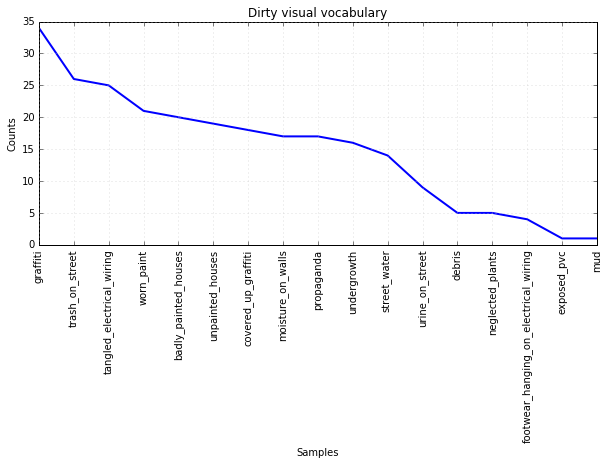

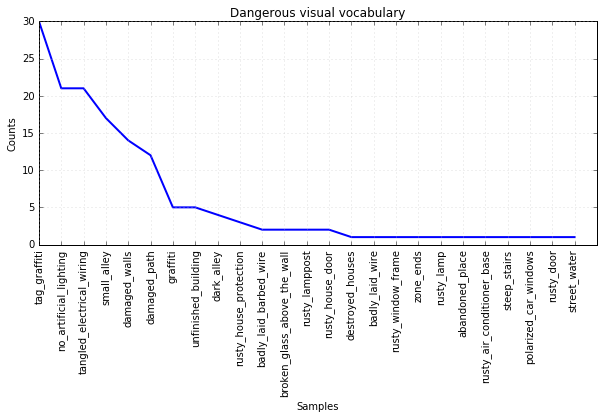

In [17]:
#For pictures which were rated with 5.0 or higher in both categories
plt.figure(figsize=(10,4))
freq_dirty.plot(50, cumulative=False,title="Dirty visual vocabulary")
plt.figure(figsize=(10,4))
freq_dangerous.plot(50,cumulative=False,title="Dangerous visual vocabulary")

# Getting a smaller subset of pictures

## For ranges [1.0, 3.0) and [3.0, 5.0)

In [19]:
#Just run in case you want to load the dataframes again
#Loading the dataframes:
f = open('random_samples/pickle/df_50_dangerous_1_3.pckl', 'rb')
df_50_dangerous_1_3= pickle.load(f)
f.close()
f = open('random_samples/pickle/df_50_dangerous_3_5.pckl', 'rb')
df_50_dangerous_3_5= pickle.load(f)
f.close()
f = open('random_samples/pickle/df_50_dangerous_5_7.pckl', 'rb')
df_50_dangerous_5_7= pickle.load(f)
f.close()
f = open('random_samples/pickle/df_50_dirty_1_3.pckl', 'rb')
df_50_dirty_1_3= pickle.load(f)
f.close()
f = open('random_samples/pickle/df_50_dirty_3_5.pckl', 'rb')
df_50_dirty_3_5= pickle.load(f)
f.close()
f = open('random_samples/pickle/df_50_dirty_5_7.pckl', 'rb')
df_50_dirty_5_7= pickle.load(f)
f.close()

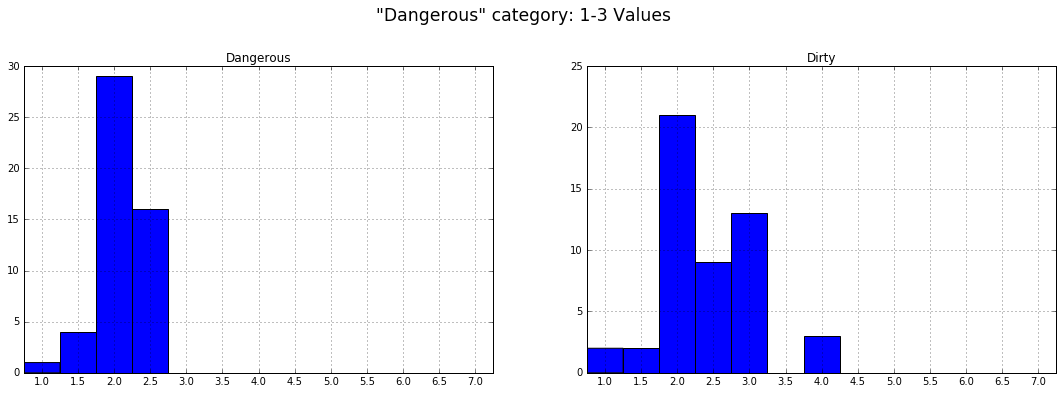

In [20]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
df_50_dangerous_1_3.Dangerous.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dangerous')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.subplot(1,2,2)
df_50_dangerous_1_3.Dirty.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dirty')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.suptitle('"Dangerous" category: 1-3 Values', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 5.5)

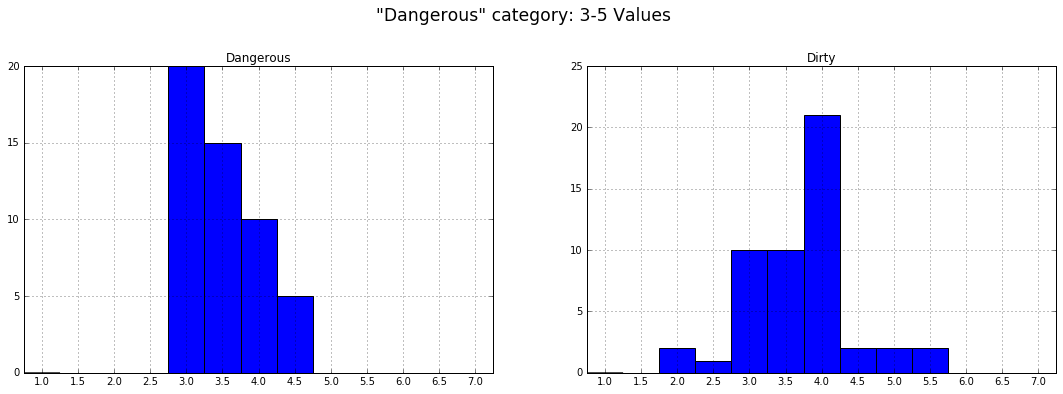

In [21]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
df_50_dangerous_3_5.Dangerous.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dangerous')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75,7.25])
plt.subplot(1,2,2)
df_50_dangerous_3_5.Dirty.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dirty')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.suptitle('"Dangerous" category: 3-5 Values', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 5.5)

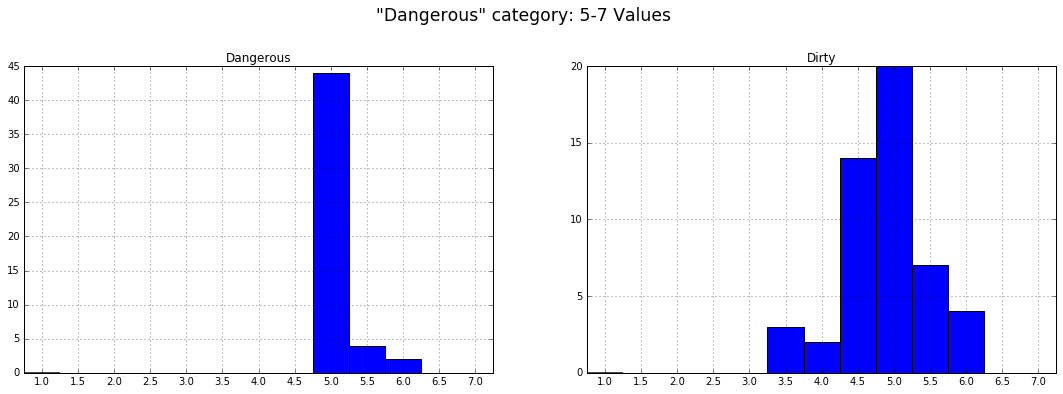

In [22]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
df_50_dangerous_5_7.Dangerous.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dangerous')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.subplot(1,2,2)
df_50_dangerous_5_7.Dirty.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dirty')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.suptitle('"Dangerous" category: 5-7 Values', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 5.5)

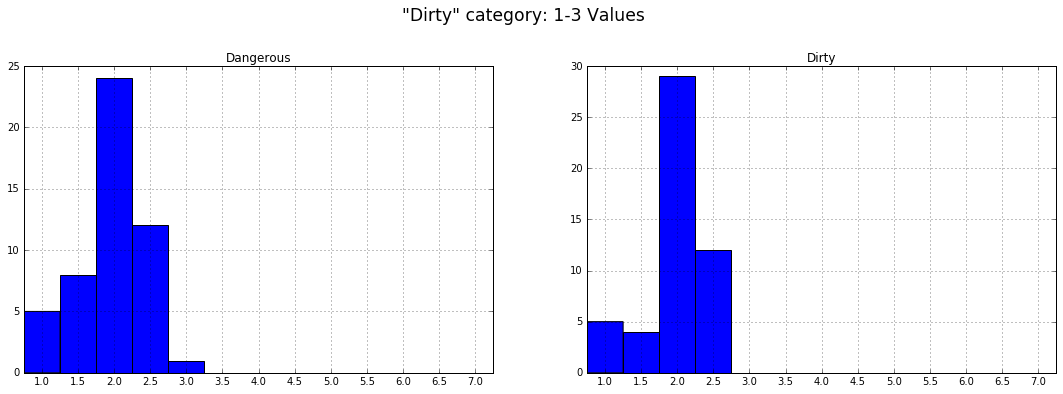

In [23]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
df_50_dirty_1_3.Dangerous.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dangerous')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.subplot(1,2,2)
df_50_dirty_1_3.Dirty.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dirty')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.suptitle('"Dirty" category: 1-3 Values', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 5.5)

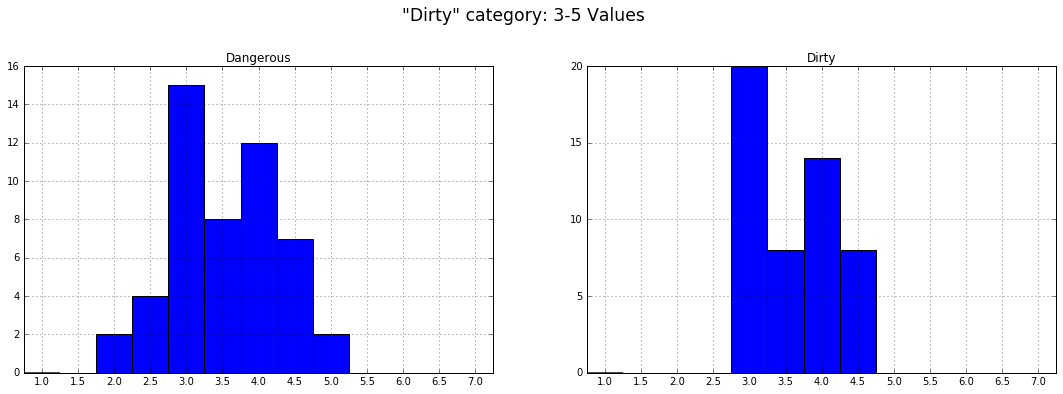

In [24]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
df_50_dirty_3_5.Dangerous.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dangerous')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.subplot(1,2,2)
df_50_dirty_3_5.Dirty.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dirty')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.suptitle('"Dirty" category: 3-5 Values', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 5.5)

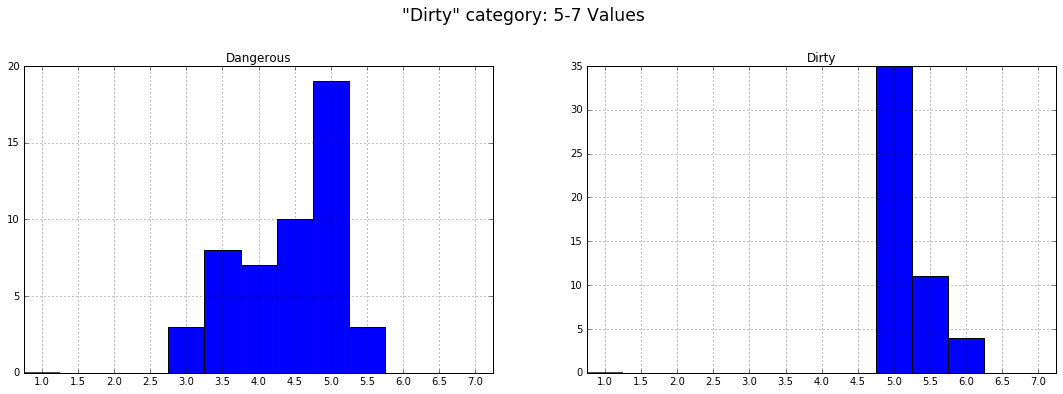

In [25]:
fig, ax = plt.subplots(nrows=1,ncols=2)
plt.subplot(1,2,1)
df_50_dirty_5_7.Dangerous.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dangerous')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.subplot(1,2,2)
df_50_dirty_5_7.Dirty.hist(bins=np.arange(1,8.0,0.5)-0.25)
plt.title('Dirty')
plt.xticks(np.arange(1,8.5,0.5))
plt.xlim([0.75, 7.25])
plt.suptitle('"Dirty" category: 5-7 Values', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.set_size_inches(18.5, 5.5)

In [6]:
#Defining working directories
dir_50_dangerous_1_3='random_samples/images/50_dangerous_1-3/'
dir_50_dangerous_3_5='random_samples/images/50_dangerous_3-5/'
dir_50_dangerous_5_7='random_samples/images/50_dangerous_5-7/'
dir_50_dirty_1_3='random_samples/images/50_dirty_1-3/'
dir_50_dirty_3_5='random_samples/images/50_dirty_3-5/'
dir_50_dirty_5_7='random_samples/images/50_dirty_5-7/'

In [27]:
def copy_images(im_dir,images_list,corpus_dir):
    for image_file in images_list:
        copyfile(corpus_dir+image_file,im_dir+image_file)

#  <span style="color:red"> Manual annotation of the pictures </span>

##  <span style="color:blue">Getting the labels for each of the intervals for each category </span>

## Dangerous Category

### Dangerous 1-3

In [8]:
#Reading the new csv file with the labels
df_50_dangerous_1_3_labels=pd.read_csv("random_samples/csv/50_dangerous_1-3_labels.csv",sep=",",converters=conv,index_col=0)

In [9]:
df_50_dangerous_1_3_labels.head()

,annotation,Dangerous,Dirty,city,labels_dangerous,labels_not_dangerous
0,s_20140101_125419.jpg,2.5,3.0,gc,"[tangled_electrical_wiring, cars_in_motion, sm...","[artificial_lighting, people_walking, cars_in_..."
1,s_20140101_125819.jpg,2.0,2.5,gc,[tag_graffiti],"[people_walking, artificial_lighting, village_..."
2,s_20140108_132924.jpg,2.0,3.0,gc,[tangled_electrical_wiring],"[people_walking, artificial_lighting]"
3,s_20140109_112525.jpg,2.0,2.0,gc,[tangled_electrical_wiring],"[people_walking, normal_parked_cars, trees]"
4,s_20140109_112734.jpg,2.0,2.0,gc,[cars_in_motion],"[village_square, people_walking, bus_stop, car..."


In [10]:
#Getting the list of the labels as well as the frequency of each one
#labels_dangerous
list_50_dangerous_1_3_labels=df_50_dangerous_1_3_labels['labels_dangerous'].sum()
freq_50_dangerous_1_3_labels=FreqDist(list_50_dangerous_1_3_labels)

#labels_not_dangerous
list_50_not_dangerous_1_3_labels=df_50_dangerous_1_3_labels['labels_not_dangerous'].sum()
freq_50_not_dangerous_1_3_labels=FreqDist(list_50_not_dangerous_1_3_labels)

In [11]:
#Showing the frequency of the labels
print("Dangerous 1-3: labels_dangerous")
freq_50_dangerous_1_3_labels.most_common(len(list_50_dangerous_1_3_labels))

Dangerous 1-3: labels_dangerous


[('cars_in_motion', 26),
 ('tangled_electrical_wiring', 23),
 ('people_walking_on_the_road', 8),
 ('tag_graffiti', 6),
 ('small_sidewalks', 4),
 ('badly_parked_cars', 2),
 ('badly_parked_motorcycles', 2),
 ('damaged_path', 2),
 ('no_artificial_lighting', 2),
 ('small_alley', 1),
 ('street_water', 1)]

In [12]:
#Showing the frequency of the labels
print("Dangerous 1-3: labels_not_dangerous")
freq_50_not_dangerous_1_3_labels.most_common(len(list_50_not_dangerous_1_3_labels))

Dangerous 1-3: labels_not_dangerous


[('people_walking', 41),
 ('artificial_lighting', 35),
 ('trees', 29),
 ('cars_in_motion', 23),
 ('commercial_zone', 21),
 ('normal_parked_cars', 14),
 ('non_neglected_plants', 14),
 ('bus_stop', 7),
 ('traffic_lights', 6),
 ('residential_zone', 5),
 ('park_benches', 5),
 ('village_square', 4),
 ('church', 3),
 ('security_cameras', 3),
 ('park_fountain', 2),
 ('mall', 2),
 ('historical_buildings', 2),
 ('commercial_corridor', 2),
 ('restaurants', 2),
 ('public_parking', 2),
 ('public_park', 1),
 ('school', 1),
 ('touristic_corridor', 1)]

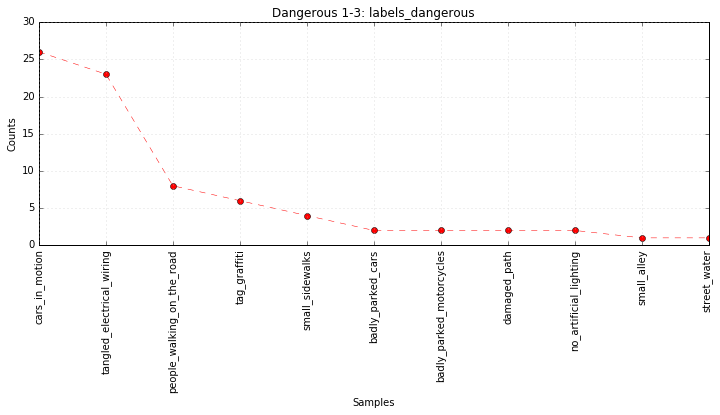

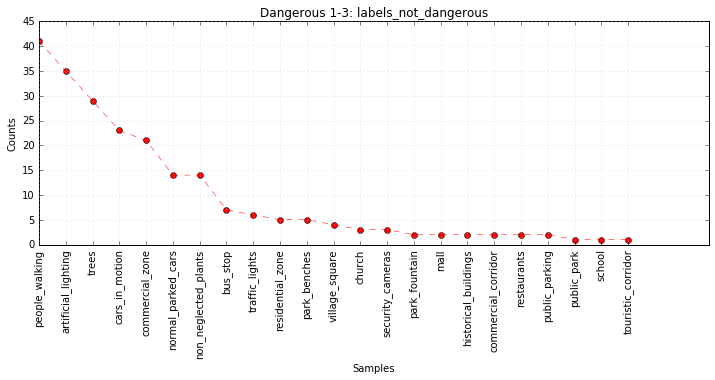

In [39]:
#Ploting the frequencies
plt.figure(figsize=(12,4))
freq_50_dangerous_1_3_labels.plot(50, cumulative=False,title="Dangerous 1-3: labels_dangerous",
                                 color='r',marker='o',linestyle='--',linewidth=0.5)
plt.figure(figsize=(12,4))
freq_50_not_dangerous_1_3_labels.plot(50,cumulative=False,title="Dangerous 1-3: labels_not_dangerous",
                                     color='r',marker='o',linestyle='--',linewidth=0.5)

### Dangerous 3-5

In [14]:
#Reading the new csv file with the labels
df_50_dangerous_3_5_labels=pd.read_csv("random_samples/csv/50_dangerous_3-5_labels.csv",sep=",",converters=conv,index_col=0)

In [15]:
df_50_dangerous_3_5_labels.head()

,annotation,Dangerous,Dirty,city,labels_dangerous,labels_not_dangerous
0,s_20140101_125835.jpg,4.0,4.0,gc,[tangled_electrical_wiring],"[artificial_lighting, people_walking, stores]"
1,s_20140109_110126.jpg,3.5,3.0,gc,"[no_sidewalk, no_artificial_lighting]",[non_neglected_plants]
2,s_20140109_114115.jpg,3.0,3.0,gc,"[dark_tunnel, badly_parked_motorcycles]","[artificial_lighting, hotel]"
3,s_20140110_152239.jpg,3.0,2.0,gc,"[tangled_electrical_wiring, unfinished_building]","[normal_parked_cars, artificial_lighting, tree..."
4,s_20140117_124302.jpg,3.0,4.0,gc,"[damaged_path, road_under_repair]","[people_walking, artificial_lighting, trees]"


In [16]:
#Getting the list of the labels as well as the frequency of each one
#labels_dangerous
list_50_dangerous_3_5_labels=df_50_dangerous_3_5_labels['labels_dangerous'].sum()
freq_50_dangerous_3_5_labels=FreqDist(list_50_dangerous_3_5_labels)

#labels_not_dangerous
list_50_not_dangerous_3_5_labels=df_50_dangerous_3_5_labels['labels_not_dangerous'].sum()
freq_50_not_dangerous_3_5_labels=FreqDist(list_50_not_dangerous_3_5_labels)

In [17]:
#Showing the frequency of the labels
print("Dangerous 3-5: labels_dangerous")
freq_50_dangerous_3_5_labels.most_common(len(list_50_dangerous_3_5_labels))

Dangerous 3-5: labels_dangerous


[('tangled_electrical_wiring', 29),
 ('cars_in_motion', 22),
 ('tag_graffiti', 20),
 ('no_artificial_lighting', 6),
 ('people_walking_on_the_road', 5),
 ('badly_parked_motorcycles', 5),
 ('small_alley', 5),
 ('damaged_walls', 4),
 ('graffiti', 3),
 ('badly_parked_cars', 3),
 ('blocked_sidewalk', 3),
 ('motorcyclist_without_helmet', 3),
 ('unfinished_building', 3),
 ('no_sidewalk', 2),
 ('rusty_lamppost', 2),
 ('trash_on_street', 1),
 ('damaged_windows', 1),
 ('debris', 1),
 ('rusty_house_door', 1),
 ('small_sidewalks', 1),
 ('damaged_path', 1),
 ('road_under_repair', 1),
 ('dark_tunnel', 1),
 ('damaged_parked_car', 1),
 ('polarized_car_windows', 1),
 ('cart', 1),
 ('destroyed_houses', 1),
 ('street_water', 1),
 ('abandoned_place', 1),
 ('stairs_without_banister', 1)]

In [18]:
#Showing the frequency of the labels
print("Dangerous 3-5: labels_not_dangerous")
freq_50_not_dangerous_3_5_labels.most_common(len(list_50_not_dangerous_3_5_labels))

Dangerous 3-5: labels_not_dangerous


[('artificial_lighting', 36),
 ('people_walking', 35),
 ('cars_in_motion', 22),
 ('normal_parked_cars', 20),
 ('trees', 20),
 ('residential_zone', 12),
 ('stores', 10),
 ('commercial_zone', 9),
 ('traffic_lights', 5),
 ('public_parking', 4),
 ('non_neglected_plants', 3),
 ('people_riding_bicycles', 3),
 ('bus_stop', 2),
 ('church', 2),
 ('pedestrian_bridge', 2),
 ('hotel', 1),
 ('motorcyclist_with_helmet', 1),
 ('commercial_corridor', 1),
 ('pedestrian_crossing', 1),
 ('middle_school', 1),
 ('mall', 1)]

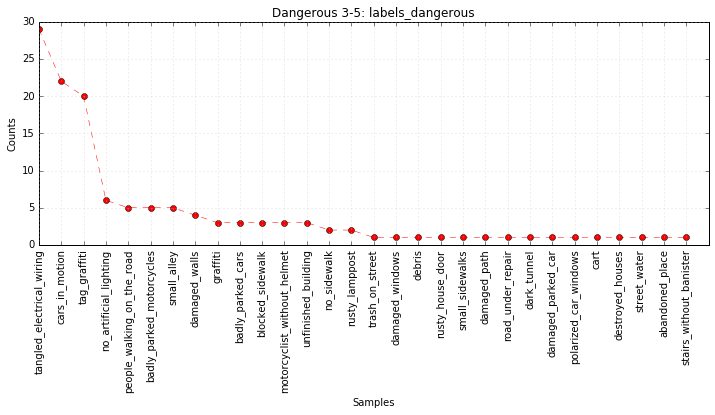

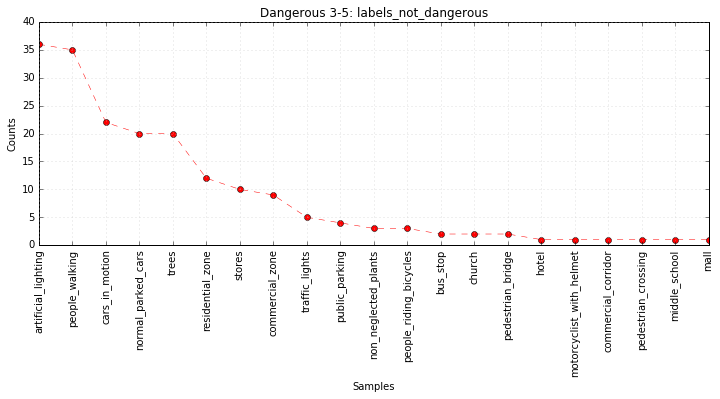

In [38]:
#Ploting the frequencies
plt.figure(figsize=(12,4))
freq_50_dangerous_3_5_labels.plot(50, cumulative=False,title="Dangerous 3-5: labels_dangerous",
                                 color='r',marker='o',linestyle='--',linewidth=0.5)
plt.figure(figsize=(12,4))
freq_50_not_dangerous_3_5_labels.plot(50,cumulative=False,title="Dangerous 3-5: labels_not_dangerous",
                                     color='r',marker='o',linestyle='--',linewidth=0.5)

## Dirty Category

### Dirty 1-3

In [20]:
#Reading the new csv file with the labels
df_50_dirty_1_3_labels=pd.read_csv("random_samples/csv/50_dirty_1-3_labels.csv",sep=",",converters=conv,index_col=0)

In [21]:
df_50_dirty_1_3_labels.head()

,annotation,Dangerous,Dirty,city,labels_dirty,labels_not_dirty
0,s_20140101_132014.jpg,2.5,2.5,gc,"[worn_paint, tangled_electrical_wiring]","[no_trash_on_street, well_painted_houses, non_..."
1,s_20140102_123503.jpg,1.5,2.0,gc,"[worn_paint, external_objects_blocking_the_pas...","[trees, well_painted_houses, monuments, lime_o..."
2,s_20140102_124355.jpg,2.0,1.5,gc,[tangled_electrical_wiring],"[no_trash_on_street, trees, non_neglected_plan..."
3,s_20140102_124833.jpg,2.0,2.0,gc,[street_water],"[trees, trash_cans, well_painted_houses, monum..."
4,s_20140108_131849.jpg,1.5,2.0,gc,[hawkers],"[park_fountain, no_trash_on_street, well_paint..."


In [22]:
#Getting the list of the labels as well as the frequency of each one
#labels_dirty
list_50_dirty_1_3_labels=df_50_dirty_1_3_labels['labels_dirty'].sum()
freq_50_dirty_1_3_labels=FreqDist(list_50_dirty_1_3_labels)

#labels_not_dirty
list_50_not_dirty_1_3_labels=df_50_dirty_1_3_labels['labels_not_dirty'].sum()
freq_50_not_dirty_1_3_labels=FreqDist(list_50_not_dirty_1_3_labels)

In [23]:
#Showing the frequency of the labels
print("Dirty 1-3: labels_dirty")
freq_50_dirty_1_3_labels.most_common(len(list_50_dirty_1_3_labels))

Dirty 1-3: labels_dirty


[('tangled_electrical_wiring', 12),
 ('worn_paint', 12),
 ('street_water', 10),
 ('tag_graffiti', 9),
 ('hawkers', 4),
 ('damaged_path', 4),
 ('graffiti', 3),
 ('trash_on_street', 3),
 ('deteriorated_sidewalk', 2),
 ('scratched_road_signs', 2),
 ('propaganda', 2),
 ('undergrowth', 2),
 ('lots_of_trash_for_one_trash_can', 1),
 ('neglected_plants', 1),
 ('rusty_railings', 1),
 ('deteriorated_telephone_registration_boxes', 1),
 ('too_much_propaganda', 1),
 ('trash_bags_on_street', 1),
 ('moisture_on_walls', 1),
 ('damaged_walls', 1),
 ('external_objects_blocking_the_passage', 1),
 ('beggars', 1),
 ('stickers_on_road_signs', 1),
 ('stickers_on_electric_meter', 1),
 ('trash_on_trees', 1),
 ('city_map_deteriorated', 1)]

In [24]:
#Showing the frequency of the labels
print("Dirty 1-3: labels_not_dirty")
freq_50_not_dirty_1_3_labels.most_common(len(list_50_not_dirty_1_3_labels))

Dirty 1-3: labels_not_dirty


[('no_trash_on_street', 43),
 ('well_preserved_path', 39),
 ('trees', 37),
 ('well_painted_houses', 34),
 ('well_preserved_sidewalk', 28),
 ('lime_on_trees', 18),
 ('non_neglected_plants', 17),
 ('clean_road_signs', 8),
 ('trash_cans', 7),
 ('monuments', 5),
 ('park_fountain', 2),
 ('artistic_graffiti', 1),
 ('park_kiosk', 1),
 ('strainer', 1)]

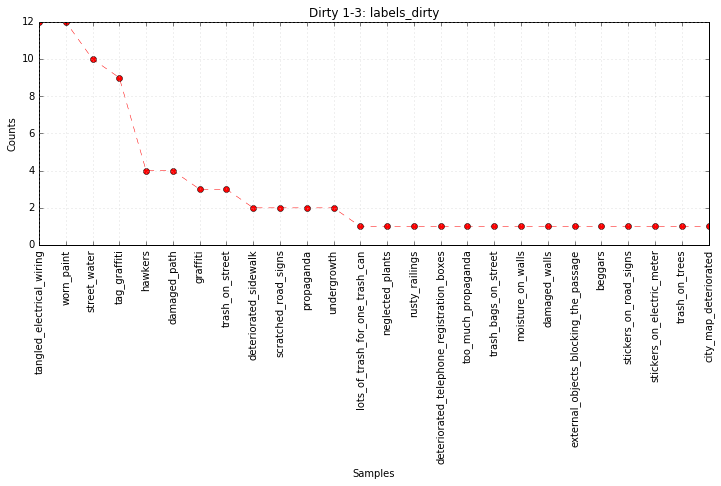

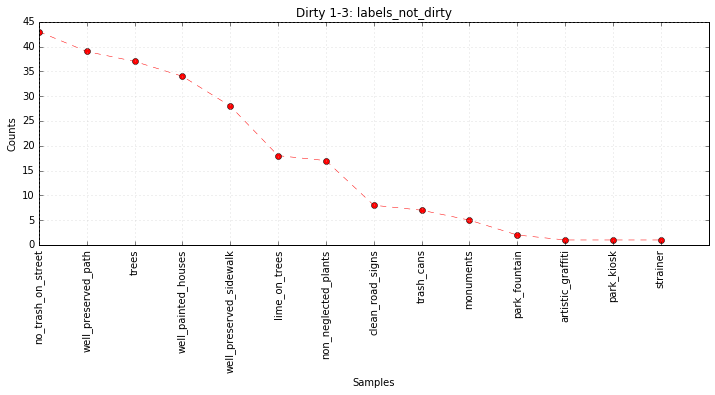

In [37]:
#Ploting the frequencies
plt.figure(figsize=(12,4))
freq_50_dirty_1_3_labels.plot(50, cumulative=False,title="Dirty 1-3: labels_dirty",
                             color='r',marker='o',linestyle='--',linewidth=0.5)
plt.figure(figsize=(12,4))
freq_50_not_dirty_1_3_labels.plot(50,cumulative=False,title="Dirty 1-3: labels_not_dirty",
                                 color='r',marker='o',linestyle='--',linewidth=0.5)

### Dirty 3-5

In [26]:
#Reading the new csv file with the labels
df_50_dirty_3_5_labels=pd.read_csv("random_samples/csv/50_dirty_3-5_labels.csv",sep=",",converters=conv,index_col=0)

In [27]:
df_50_dirty_3_5_labels.head()

,annotation,Dangerous,Dirty,city,labels_dirty,labels_not_dirty
0,s_20140108_134620.jpg,4.5,4.5,gc,"[worn_paint, damaged_walls, damaged_door_frame...","[no_trash_on_street, clean_road_signs]"
1,s_20140109_121545.jpg,2.5,3.5,gc,"[worn_paint, stickers_on_road_signs]","[well_painted_houses, trees]"
2,s_20140117_172125.jpg,5.0,3.5,gc,"[tag_graffiti, urine_on_walls, tangled_electri...",[no_trash_on_street]
3,s_20140117_172321.jpg,4.5,4.0,gc,"[tangled_electrical_wiring, trash_on_street, w...",[well_preserved_path]
4,s_20140118_160120.jpg,4.5,4.5,gc,"[tag_graffiti, rusty_lamppost, covered_up_graf...","[no_trash_on_street, well_preserved_path, well..."


In [28]:
#Getting the list of the labels as well as the frequency of each one
#labels_dirty
list_50_dirty_3_5_labels=df_50_dirty_3_5_labels['labels_dirty'].sum()
freq_50_dirty_3_5_labels=FreqDist(list_50_dirty_3_5_labels)

#labels_not_dirty
list_50_not_dirty_3_5_labels=df_50_dirty_3_5_labels['labels_not_dirty'].sum()
freq_50_not_dirty_3_5_labels=FreqDist(list_50_not_dirty_3_5_labels)

In [29]:
#Showing the frequency of the labels
print("Dirty 3-5: labels_dirty")
freq_50_dirty_3_5_labels.most_common(len(list_50_dirty_3_5_labels))

Dirty 3-5: labels_dirty


[('tag_graffiti', 28),
 ('worn_paint', 24),
 ('tangled_electrical_wiring', 23),
 ('trash_on_street', 14),
 ('unpainted_houses', 12),
 ('street_water', 11),
 ('graffiti', 8),
 ('mud', 8),
 ('damaged_path', 8),
 ('covered_up_graffiti', 8),
 ('undergrowth', 8),
 ('damaged_sidewalk', 7),
 ('hawkers', 7),
 ('propaganda', 6),
 ('external_objects_blocking_the_passage', 5),
 ('moisture_on_walls', 5),
 ('damaged_walls', 4),
 ('badly_painted_houses', 3),
 ('neglected_plants', 3),
 ('damaged_canvas', 2),
 ('no_electrical_meter', 2),
 ('urine_on_walls', 2),
 ('stickers_on_road_signs', 2),
 ('stickers_on_walls', 2),
 ('debris', 2),
 ('rusty_lamppost', 2),
 ('trash_bags_on_street', 2),
 ('street_under_repair', 2),
 ('badly_parked_bicycle', 2),
 ('worn_house_door', 2),
 ('damaged_ad', 1),
 ('rusty_window_protections', 1),
 ('damaged_road_signs', 1),
 ('rusty_road_sign_post', 1),
 ('path_with_mud', 1),
 ('rusty_metal_roof', 1),
 ('lamps_without_protection', 1),
 ('propaganda_remains', 1),
 ('dirty_spo

In [30]:
#Showing the frequency of the labels
print("Dirty 3-5: labels_not_dirty")
freq_50_not_dirty_3_5_labels.most_common(len(list_50_not_dirty_3_5_labels))

Dirty 3-5: labels_not_dirty


[('no_trash_on_street', 30),
 ('well_preserved_path', 29),
 ('trees', 22),
 ('well_painted_houses', 19),
 ('well_preserved_sidewalk', 16),
 ('non_neglected_plants', 9),
 ('clean_road_signs', 8),
 ('trash_cans', 3),
 ('lime_on_trees', 2),
 ('park_fountain', 1),
 ('strainer', 1)]

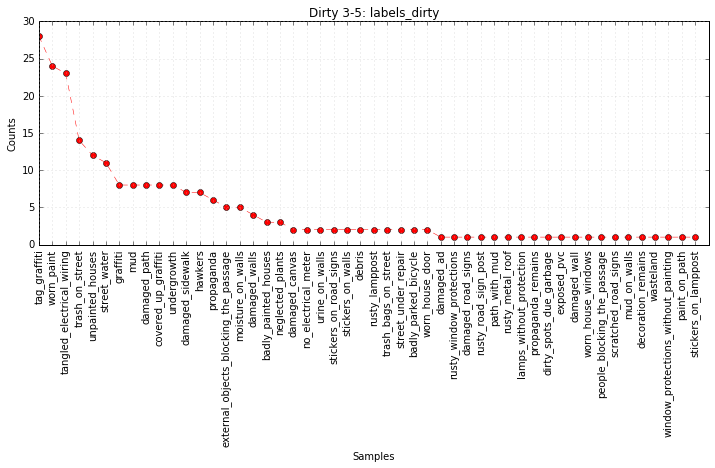

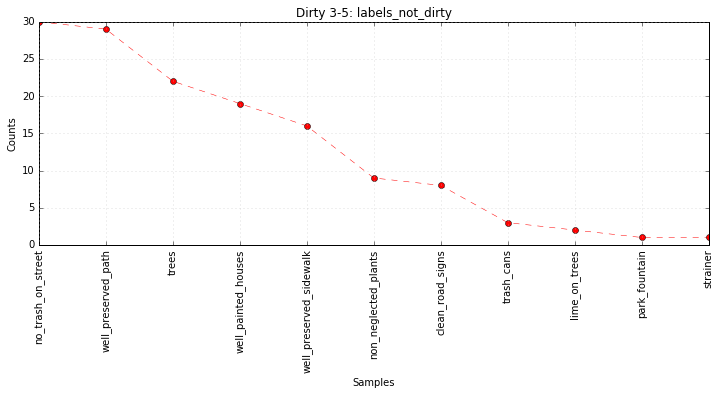

In [36]:
#Ploting the frequencies
plt.figure(figsize=(12,4))
freq_50_dirty_3_5_labels.plot(50, cumulative=False,title="Dirty 3-5: labels_dirty",
                             color='r',marker='o',linestyle='--',linewidth=0.5)
plt.figure(figsize=(12,4))
freq_50_not_dirty_3_5_labels.plot(50,cumulative=False,title="Dirty 3-5: labels_not_dirty",
                                  color='r',marker='o',linestyle='--',linewidth=0.5)

## NON-Dirty and NON-dangerous (5-7)

In [14]:
#Reading the new csv file with the labels
df_44_not_dirty_not_dangerous_5_7_labels=pd.read_csv("non_dirty_non_dangerous_images.csv",sep=",",converters=conv,index_col=0)

In [15]:
df_44_not_dirty_not_dangerous_5_7_labels.head()

,annotation,Dangerous,Dirty,city,labels_not_dangerous,labels_not_dirty
0,s_20140101_132603.jpg,6.0,6.0,gc,[],[]
1,s_20140108_124301.jpg,5.0,5.0,gc,"[residential_zone, non_neglected_plants]",[non_neglected_plants]
2,s_20140108_124541.jpg,5.0,5.0,gc,"[artificial_lighting, non_neglected_plants, re...","[non_neglected_plants, well_painted_houses, no..."
3,s_20140117_171152.jpg,5.5,5.5,gc,[],[]
4,s_20140117_173103.jpg,5.0,5.0,gc,[artificial_lighting],"[no_trash_on_street, well_preserved_path]"


In [16]:
#Getting the list of the labels as well as the frequency of each one
#labels_non-dirty
list_44_not_dirty_5_7_labels=df_44_not_dirty_not_dangerous_5_7_labels['labels_not_dirty'].sum()
freq_44_not_dirty_5_7_labels=FreqDist(list_44_not_dirty_5_7_labels)

#labels_non-dangerous
list_44_not_dangerous_5_7_labels=df_44_not_dirty_not_dangerous_5_7_labels['labels_not_dangerous'].sum()
freq_44_not_dangerous_5_7_labels=FreqDist(list_44_not_dangerous_5_7_labels)

In [17]:
#Showing the frequency of the labels
print("Dirty 5-7: labels_NON_dirty")
freq_44_not_dirty_5_7_labels.most_common(len(list_44_not_dirty_5_7_labels))

Dirty 5-7: labels_NON_dirty


[('trees', 10),
 ('no_trash_on_street', 10),
 ('well_preserved_path', 9),
 ('non_neglected_plants', 7),
 ('well_painted_houses', 6),
 ('well_preserved_sidewalk', 5),
 ('trash_cans', 2),
 ('well_preserved_roads', 1)]

In [18]:
#Showing the frequency of the labels
print("Dangerous 5-7: labels_NON_dangerous")
freq_44_not_dangerous_5_7_labels.most_common(len(list_44_not_dangerous_5_7_labels))

Dangerous 5-7: labels_NON_dangerous


[('artificial_lighting', 22),
 ('normal_parked_cars', 14),
 ('people_walking', 12),
 ('trees', 11),
 ('residential_zone', 8),
 ('cars_in_motion', 7),
 ('non_neglected_plants', 6),
 ('stores', 6),
 ('people_riding_bicycles', 5),
 ('normal_parked_car', 2),
 ('security_cameras', 1),
 ('well_preserved_path', 1),
 ('commercial_zone', 1),
 ('bus_stop', 1)]

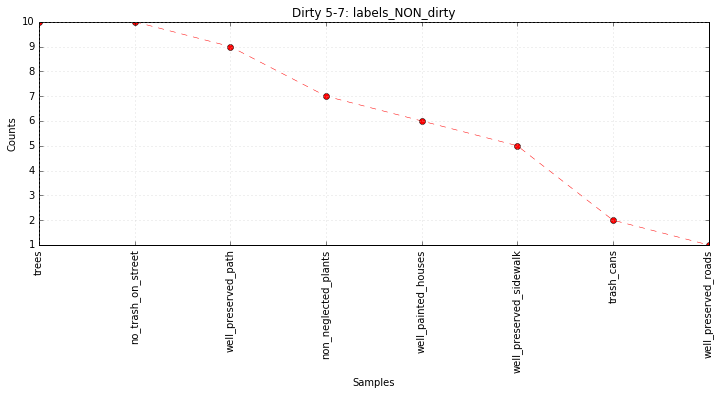

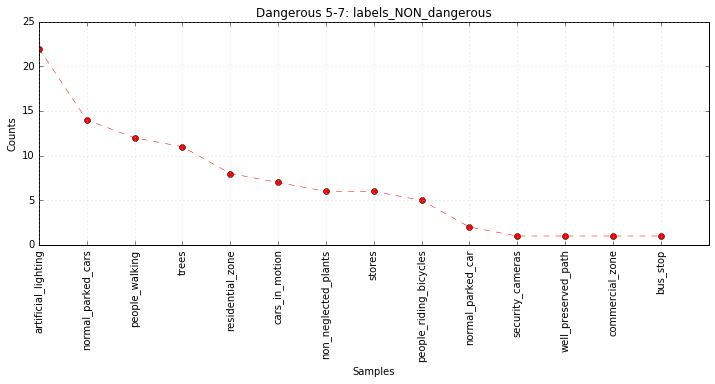

In [19]:
#Ploting the frequencies
plt.figure(figsize=(12,4))
freq_44_not_dirty_5_7_labels.plot(44, cumulative=False,title="Dirty 5-7: labels_NON_dirty",
                             color='r',marker='o',linestyle='--',linewidth=0.5)
plt.figure(figsize=(12,4))
freq_44_not_dangerous_5_7_labels.plot(44,cumulative=False,title="Dangerous 5-7: labels_NON_dangerous",
                                  color='r',marker='o',linestyle='--',linewidth=0.5)

#  <span style="color:red">Manual clustering </span>

## Dangerous

In [28]:
dangerous_clusters=["vandalism","lack_of_exterior_maintenance","unkempt_house_building","no_security_house_building_elements",
                 "no_outdoor_lighting","vacant_lots","place_for_concealment","blocking_elements","littering",
                 "negative_elements_regarding_people","bad_planning","suspicious_elements"]
not_dangerous_clusters=["positive_elements_regarding_people","vegetation","outdoor_lighting","traffic_elements",
                        "education","residential_zone","commercial_zone","security_elements","touristic_zone",
                        "park_elements"]

In [109]:
#Dangerous
df_dangerous_clusters=pd.DataFrame(dangerous_clusters)
df_dangerous_clusters.columns = ['cluster']
danger_cluster_freq_1_3=[6,25,0,0,2,0,1,4,1,0,4,0]
df_dangerous_clusters['freq_Dangerous_1-3']=danger_cluster_freq_1_3
danger_cluster_freq_3_5=[23,36,2,0,6,5,6,13,2,30,3,3]
df_dangerous_clusters['freq_Dangerous_3-5']=danger_cluster_freq_3_5
danger_cluster_freq_5_7=[35,52,8,2,21,7,22,0,1,0,1,1]
df_dangerous_clusters['freq_Dangerous_5-7']=danger_cluster_freq_5_7
df_dangerous_clusters

,cluster,freq_Dangerous_1-3,freq_Dangerous_3-5,freq_Dangerous_5-7
0,vandalism,6,23,35
1,lack_of_exterior_maintenance,25,36,52
2,unkempt_house_building,0,2,8
3,no_security_house_building_elements,0,0,2
4,no_outdoor_lighting,2,6,21
5,vacant_lots,0,5,7
6,place_for_concealment,1,6,22
7,blocking_elements,4,13,0
8,littering,1,2,1
9,negative_elements_regarding_people,0,30,0


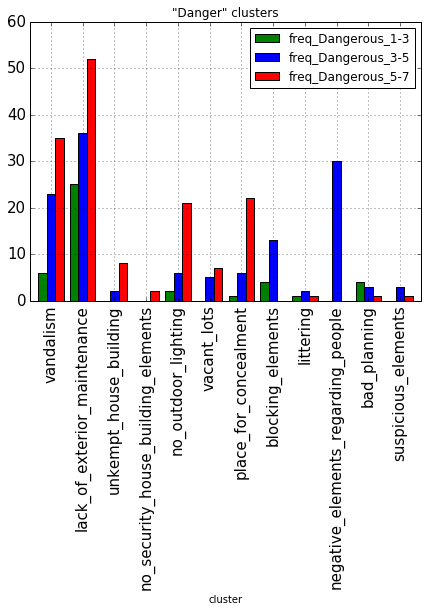

In [121]:
#Plot
df_dangerous_clusters.plot('cluster', kind='bar', color='gbr',grid=True,figsize=(7,5),fontsize=15,width=0.8,
                           title='"Danger" clusters')

In [31]:
#Not Dangerous
df_not_dangerous_clusters=pd.DataFrame(not_dangerous_clusters)
df_not_dangerous_clusters.columns = ['cluster']
not_danger_cluster_freq_1_3=[78,43,35,15,1,5,25,3,5,15]
df_not_dangerous_clusters['freq_NON_Dangerous_1-3']=not_danger_cluster_freq_1_3
not_danger_cluster_freq_3_5=[81,5,36,14,1,12,21,0,1,1]
df_not_dangerous_clusters['freq_NON_Dangerous_3-5']=not_danger_cluster_freq_3_5
not_danger_cluster_freq_5_7=[38,18,22,1,0,8,7,1,0,0]
df_not_dangerous_clusters['freq_NON_Dangerous_5-7']=not_danger_cluster_freq_5_7
df_not_dangerous_clusters

,cluster,freq_NON_Dangerous_1-3,freq_NON_Dangerous_3-5,freq_NON_Dangerous_5-7
0,positive_elements_regarding_people,78,81,38
1,vegetation,43,5,18
2,outdoor_lighting,35,36,22
3,traffic_elements,15,14,1
4,education,1,1,0
5,residential_zone,5,12,8
6,commercial_zone,25,21,7
7,security_elements,3,0,1
8,touristic_zone,5,1,0
9,park_elements,15,1,0


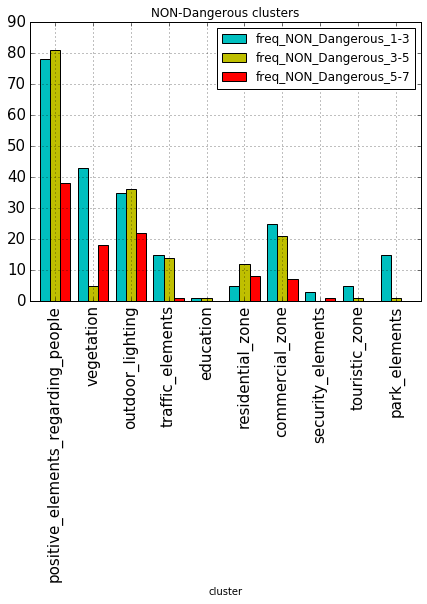

In [32]:
#Plot
df_not_dangerous_clusters.plot('cluster', kind='bar', color='cyr',grid=True,figsize=(7,5),fontsize=15,width=0.8,
                               title='NON-Dangerous clusters')

## Dirty

In [21]:
dirty_clusters=["vandalism","littering","unkempt_houses_buildings","neglected_vegetation","blocking_elements",
                "negative_elements_regarding_the_people","deteriorated_road_signs","lack_of_exterior_maintenance",
                "remaining"]
not_dirty_clusters=["no_littering","vegetation","exterior_maintenances","well_maintained_houses_buildings",
                    "well_maintained_traffic_elements","park_elements"]

In [136]:
#Dirty
df_dirty_clusters=pd.DataFrame(dirty_clusters)
df_dirty_clusters.columns = ['cluster']
dirty_cluster_freq_1_3=[14,15,14,3,2,5,3,20,3]
df_dirty_clusters['freq_Dirty_1-3']=dirty_cluster_freq_1_3
dirty_cluster_freq_3_5=[41,29,69,6,14,7,4,44,12]
df_dirty_clusters['freq_Dirty_3-5']=dirty_cluster_freq_3_5
dirty_cluster_freq_5_7=[34,49,97,21,5,0,0,25,21]
df_dirty_clusters['freq_Dirty_5-7']=dirty_cluster_freq_5_7
df_dirty_clusters

,cluster,freq_Dirty_1-3,freq_Dirty_3-5,freq_Dirty_5-7
0,vandalism,14,41,34
1,littering,15,29,49
2,unkempt_houses_buildings,14,69,97
3,neglected_vegetation,3,6,21
4,blocking_elements,2,14,5
5,negative_elements_regarding_the_people,5,7,0
6,deteriorated_road_signs,3,4,0
7,lack_of_exterior_maintenance,20,44,25
8,remaining,3,12,21


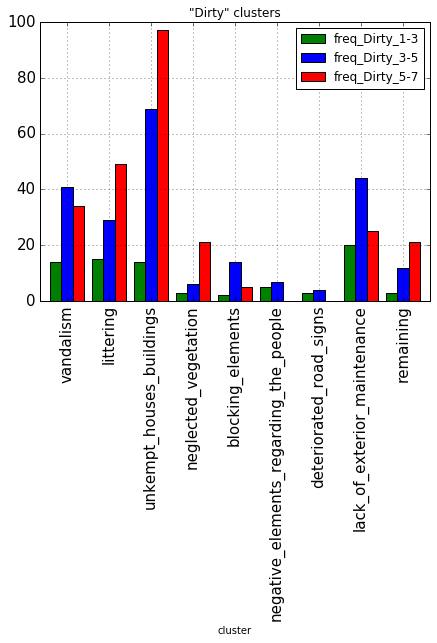

In [137]:
#Plot
df_dirty_clusters.plot('cluster', kind='bar', color='gbr',grid=True,figsize=(7,5),fontsize=15,width=0.8,
                           title='"Dirty" clusters')

In [33]:
#Not Dirty
df_not_dirty_clusters=pd.DataFrame(not_dirty_clusters)
df_not_dirty_clusters.columns = ['cluster']
not_dirty_cluster_freq_1_3=[51,72,67,34,8,8]
df_not_dirty_clusters['freq_NON_Dirty_1-3']=not_dirty_cluster_freq_1_3
not_dirty_cluster_freq_3_5=[34,33,45,19,8,1]
df_not_dirty_clusters['freq_NON_Dirty_3-5']=not_dirty_cluster_freq_3_5
not_dirty_cluster_freq_5_7=[12,17,11,6,0,0]
df_not_dirty_clusters['freq_NON_Dirty_5-7']=not_dirty_cluster_freq_5_7
df_not_dirty_clusters

,cluster,freq_NON_Dirty_1-3,freq_NON_Dirty_3-5,freq_NON_Dirty_5-7
0,no_littering,51,34,12
1,vegetation,72,33,17
2,exterior_maintenances,67,45,11
3,well_maintained_houses_buildings,34,19,6
4,well_maintained_traffic_elements,8,8,0
5,park_elements,8,1,0


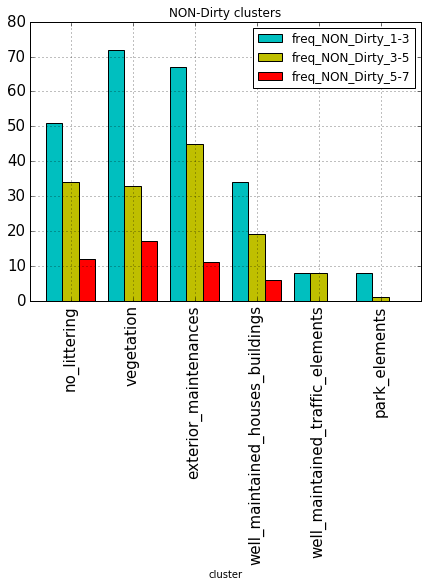

In [34]:
#Plot
df_not_dirty_clusters.plot('cluster', kind='bar', color='cyr',grid=True,figsize=(7,5),fontsize=15,width=0.8,
                               title='NON-Dirty clusters')